# Pymaceuticals Inc.
---

### Analysis

- In this study, the drug of interest, Capomulin, appears to be a highly effective regimen for mice diagnosed with squamous cell carcinoma (SCC) when compared to the other drugs tested in this study. This can be seen when comparing the box plots below, showing how the average tumor volume at the end of the Capomulin treatment is noticably lower than Ifubinol and Ceftamin. The data also shows that Ramicane can be considered a rival drug regimen, as the average tumor volume for mice treated with Ramicane is similar to that of Capomulin, showing that this treatment has a similar success rate in mice. Additionally, we are able to infer that the weight of a mouse has a positive correlation to the volume of its tumor, indicating that larger mice tend to have larger tumors while smaller mice tend to have smaller tumors.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
metadata_merged_df = pd.merge(mouse_metadata,study_results,on=["Mouse ID", "Mouse ID"],how="right")

# Display the data table for preview
metadata_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [3]:
# Checking for number of mice.
mice_total = len(metadata_merged_df["Mouse ID"].unique())
mice_total

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = metadata_merged_df.loc[metadata_merged_df.duplicated(['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_data = metadata_merged_df.loc[metadata_merged_df['Mouse ID'] == 'g989',:]
duplicates_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_metadata_df = metadata_merged_df.drop_duplicates()
clean_metadata_df = clean_metadata_df[~clean_metadata_df['Mouse ID'].isin(duplicates)]

clean_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_total = len(clean_metadata_df["Mouse ID"].unique())
clean_mice_total

248

## Summary Statistics


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_vol = clean_metadata_df['Tumor Volume (mm3)'].groupby(clean_metadata_df['Drug Regimen']).mean()
median_tumor_vol = clean_metadata_df['Tumor Volume (mm3)'].groupby(clean_metadata_df['Drug Regimen']).median()
variance_tumor_vol = clean_metadata_df['Tumor Volume (mm3)'].groupby(clean_metadata_df['Drug Regimen']).var()
stdev_tumor_vol = clean_metadata_df['Tumor Volume (mm3)'].groupby(clean_metadata_df['Drug Regimen']).std()
sem_tumor_vol = clean_metadata_df['Tumor Volume (mm3)'].groupby(clean_metadata_df['Drug Regimen']).sem()

summary_df = pd.DataFrame({'Mean Tumor Volume': mean_tumor_vol,
                           'Median Tumor Volume': median_tumor_vol,
                           'Tumor Volume Variance': variance_tumor_vol,
                           'Tumor Volume Std. Dev.': stdev_tumor_vol,
                           'Tumor Volume Std. Err': sem_tumor_vol})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_aggregation = clean_metadata_df.groupby(clean_metadata_df['Drug Regimen'])[['Tumor Volume (mm3)']].aggregate(['mean','median','var','std','sem'])
summary_df_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

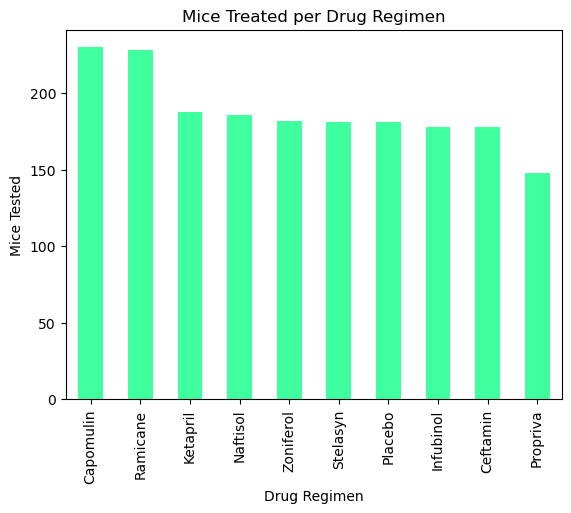

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_metadata_df['Drug Regimen'].value_counts()
pandas_bar=drug_regimen.plot(kind="bar", color="springgreen", alpha=0.75, title="Mice Treated per Drug Regimen", xlabel="Drug Regimen", ylabel="Mice Tested")


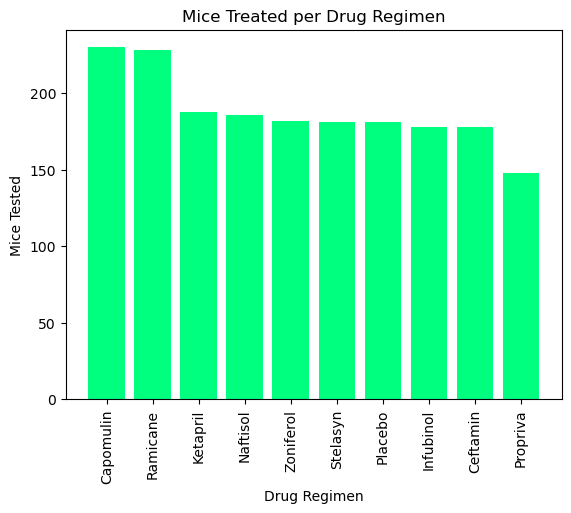

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=drug_regimen.index.values
y_axis=drug_regimen.values
plt.bar(x_axis, y_axis, color="springgreen", align="center")
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")
plt.title("Mice Treated per Drug Regimen")
plt.show()

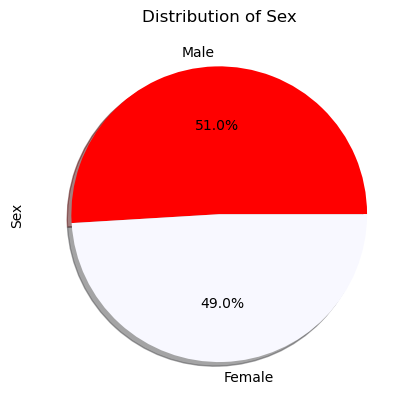

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_metadata_df['Sex'].value_counts()
pandas_pie=mice_sex.plot(kind="pie", colors = ["red", "ghostwhite"], title="Distribution of Sex", 
                         ylabel="Sex", shadow = True, autopct="%1.1f%%")


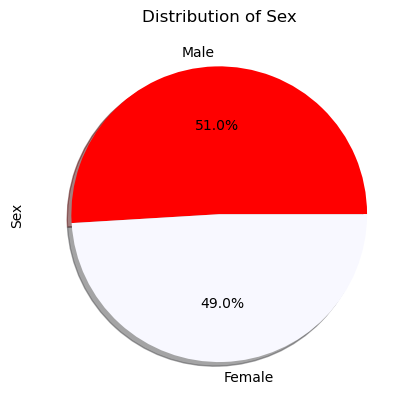

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = clean_metadata_df['Sex'].value_counts()
plt.pie(mice_sex, labels = ["Male", "Female"], colors= ["red", "ghostwhite"],
        autopct="%1.1f%%", shadow=True)
plt.title("Distribution of Sex")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots


In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_metadata_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_vol_df = pd.merge(greatest_timepoint_df, clean_metadata_df, on=["Mouse ID", "Timepoint"])
final_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows = final_vol_df[final_vol_df['Drug Regimen']==drug]
    tumor_vol = rows['Tumor Volume (mm3)']

    # add subset 
    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_vol.loc[(tumor_vol <= lower_bound) | (tumor_vol >= upper_bound)]
    print(f"{drug} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


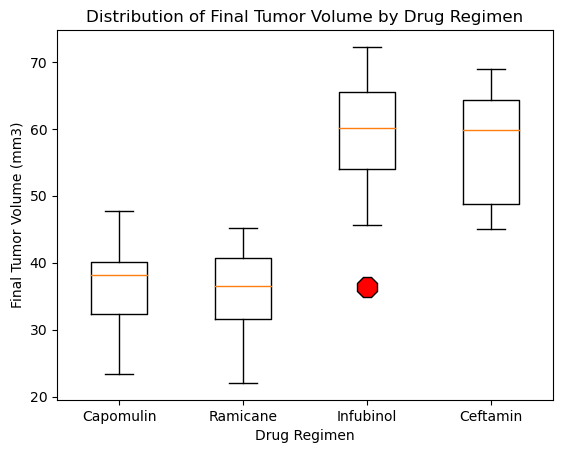

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_list, labels=treatment, flierprops={'marker':'8', 'markerfacecolor': 'red', 'markersize': 15})
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_title("Distribution of Final Tumor Volume by Drug Regimen")
plt.show()

## Line and Scatter Plots


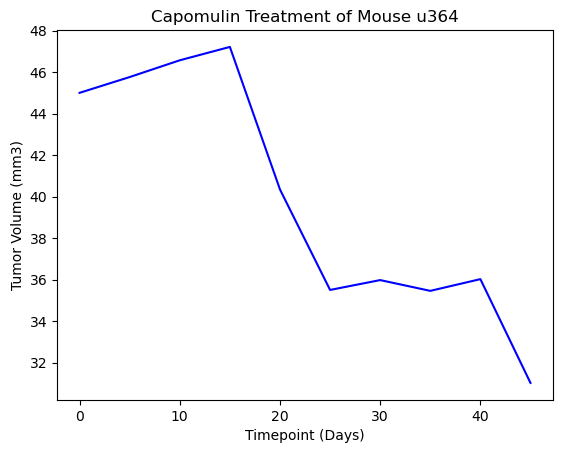

In [99]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_metadata_df.loc[clean_metadata_df["Drug Regimen"] == "Capomulin",:]
single_mouse = capomulin_df.tail(1)
single_mouse_id = 'u364'

single_mouse_data = capomulin_df.loc[capomulin_df["Mouse ID"]==single_mouse_id]
single_mouse_data

plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], color="b")
plt.title(f"Capomulin Treatment of Mouse {single_mouse_id}")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

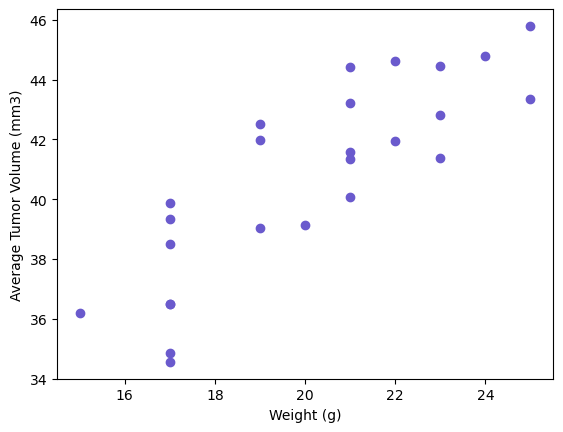

In [106]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_data = capomulin_df.groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]

plt.scatter(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"], marker='o', color='slateblue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression


The correlation between mouse weight and the average tumor volume is 0.84


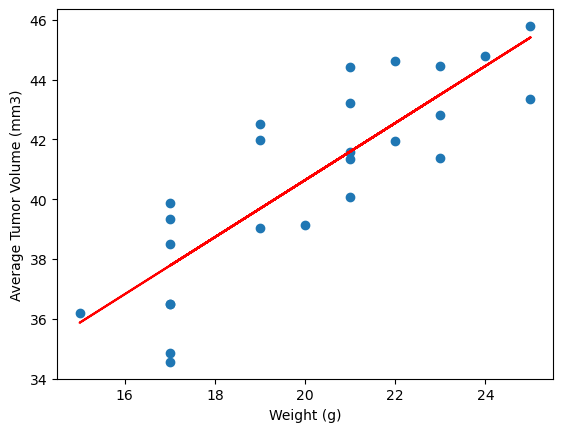

In [111]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight=scatter_data['Weight (g)']
avg_tumor_vol=scatter_data['Tumor Volume (mm3)']
correlation=st.pearsonr(weight,avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=scatter_data['Weight (g)']
y_values=scatter_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
eq_of_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()